# 3D Graph for Mol

Only use the distance to build different edge. Like the 
- single bond: 1.54A
- aromatic bond: 1.40A
- double bond: 1.34A
- triple bond is: 1.20A

In [1]:
import pickle
from tqdm import tqdm
from torchdrug import utils, data, layers

In [2]:
mol_pkl = '../../../data/dta-datasets/Davis/3d_Molecule.pkl'
with utils.smart_open(mol_pkl, "rb") as fin:
    mol_list = pickle.load(fin)

In [3]:
mol_list

[Molecule(num_atom=27, num_bond=60),
 Molecule(num_atom=40, num_bond=90),
 Molecule(num_atom=38, num_bond=82),
 Molecule(num_atom=25, num_bond=54),
 Molecule(num_atom=34, num_bond=74),
 Molecule(num_atom=28, num_bond=62),
 Molecule(num_atom=28, num_bond=62),
 Molecule(num_atom=38, num_bond=84),
 Molecule(num_atom=20, num_bond=42),
 Molecule(num_atom=37, num_bond=80),
 Molecule(num_atom=36, num_bond=78),
 Molecule(num_atom=27, num_bond=60),
 Molecule(num_atom=37, num_bond=82),
 Molecule(num_atom=25, num_bond=54),
 Molecule(num_atom=34, num_bond=74),
 Molecule(num_atom=33, num_bond=74),
 Molecule(num_atom=30, num_bond=66),
 Molecule(num_atom=33, num_bond=72),
 Molecule(num_atom=39, num_bond=86),
 Molecule(num_atom=36, num_bond=76),
 Molecule(num_atom=39, num_bond=90),
 Molecule(num_atom=29, num_bond=62),
 Molecule(num_atom=46, num_bond=102),
 Molecule(num_atom=25, num_bond=56),
 Molecule(num_atom=31, num_bond=68),
 Molecule(num_atom=27, num_bond=58),
 Molecule(num_atom=31, num_bond=68),


In [ ]:
graph_construction_model = layers.GraphConstruction(node_layers=[layers.geometry.IdentityNode()], 
                                                    edge_layers=[layers.geometry.SpatialEdge(radius=3.0, min_distance=1.6, mode_type = "molecule"), # hydeogen/ionic  bond
                                                                 layers.geometry.SpatialEdge(radius=1.6, min_distance=1.4, mode_type = "molecule"), # single bond
                                                                 layers.geometry.SpatialEdge(radius=1.4, min_distance=1.3, mode_type = "molecule"), # aromatic bond
                                                                 layers.geometry.SpatialEdge(radius=1.3, min_distance=1.0, mode_type = "molecule"), # double bond
                                                                 ],
                                                    edge_feature="molecule")

#### Single demo

In [5]:
mol = mol_list[3]
mol

Molecule(num_atom=25, num_bond=54)

In [6]:
mol.edge_list.t()[2:3]  # the bond {0: single, 1:double, 2:triple, 3:aromatic}

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 3, 3, 3, 3,
         3, 3, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
         0, 0, 3, 3, 3, 3]])

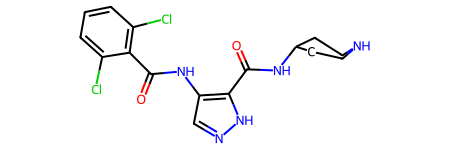

In [8]:
mol.to_molecule()

In [7]:
mol.node_position

tensor([[ 4.0136,  1.0087,  0.9047],
        [ 5.3054,  0.1870,  0.8937],
        [ 5.9950,  0.6293, -0.3070],
        [ 5.3077,  0.0337, -1.4300],
        [ 3.8609,  0.3619, -1.5138],
        [ 3.1434,  0.5905, -0.2395],
        [ 2.2719, -0.5222,  0.0542],
        [ 0.8542, -0.4633,  0.1075],
        [ 0.3691,  0.6440, -0.1212],
        [ 0.0099, -1.6004,  0.4055],
        [-1.3642, -1.6842,  0.4895],
        [-1.6237, -2.9974,  0.7988],
        [-0.4442, -3.6952,  0.9007],
        [ 0.5315, -2.8422,  0.6616],
        [-2.2117, -0.5636,  0.2769],
        [-3.6218, -0.6875,  0.3688],
        [-4.0784, -1.8616,  0.6656],
        [-4.6187,  0.3141,  0.1815],
        [-4.4509,  1.5026, -0.4555],
        [-5.4953,  2.4509, -0.5408],
        [-6.7045,  2.2041,  0.0113],
        [-6.9124,  1.0184,  0.6596],
        [-5.8950,  0.1095,  0.7363],
        [-6.2156, -1.3913,  1.5815],
        [-2.9453,  1.8908, -1.2419]])

In [11]:
mol.bond_feature.shape

torch.Size([54, 18])

In [9]:
node_in, node_out = mol.edge_list.t()[:2]
(mol.node_position[node_in] - mol.node_position[node_out]).norm(dim=-1)

tensor([1.5310, 1.5310, 1.4535, 1.4535, 1.4450, 1.4450, 1.4860, 1.4860, 1.4802,
        1.4802, 1.4435, 1.4435, 1.4199, 1.4199, 1.2304, 1.2304, 1.4473, 1.4473,
        1.3791, 1.3791, 1.3739, 1.3739, 1.3743, 1.3743, 1.3179, 1.3179, 1.4210,
        1.4210, 1.4186, 1.4186, 1.2942, 1.2942, 1.4255, 1.4255, 1.3588, 1.3588,
        1.4133, 1.4133, 1.3520, 1.3520, 1.3672, 1.3672, 1.3664, 1.3664, 1.7520,
        1.7520, 1.7424, 1.7424, 1.4971, 1.4971, 1.3711, 1.3711, 1.4066, 1.4066])

In [13]:
smile = 'C1CNCCC1NC(=O)C2=C(C=NN2)NC(=O)C3=C(C=CC=C3Cl)Cl'

In [14]:
mol2 = data.Molecule.from_smiles(smile)
mol2

Molecule(num_atom=25, num_bond=54)

In [15]:
mol2.atom_type

tensor([ 6,  6,  7,  6,  6,  6,  7,  6,  8,  6,  6,  6,  7,  7,  7,  6,  8,  6,
         6,  6,  6,  6,  6, 17, 17])

In [16]:
node_in, node_out, _ = mol2.edge_list.t()

In [17]:
in_atom_type, out_atom_type = mol2.atom_type[node_in], mol2.atom_type[node_out]

In [18]:
in_atom_type

tensor([ 6,  6,  6,  7,  7,  6,  6,  6,  6,  6,  6,  7,  7,  6,  6,  8,  6,  6,
         6,  6,  6,  6,  6,  7,  7,  7,  6,  7,  7,  6,  6,  8,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6, 17,  6, 17,  6,  6,  7,  6,  6,  6])

In [ ]:
graph = data.Molecule.pack([mol])
transGraph = graph_construction_model(graph)
transGraph

In [11]:
data.feature.atom_vocab

{'H': 0,
 'B': 1,
 'C': 2,
 'N': 3,
 'O': 4,
 'F': 5,
 'Mg': 6,
 'Si': 7,
 'P': 8,
 'S': 9,
 'Cl': 10,
 'Cu': 11,
 'Zn': 12,
 'Se': 13,
 'Br': 14,
 'Sn': 15,
 'I': 16}

In [13]:
mol.to_smiles()

'O=C(NC1CCNCC1)c1[nH]ncc1NC(=O)c1c(Cl)cccc1Cl'

In [12]:
graph.atom_type

tensor([ 6,  6,  7,  6,  6,  6,  7,  6,  8,  6,  6,  6,  7,  7,  7,  6,  8,  6,
         6,  6,  6,  6,  6, 17, 17])

In [26]:
transGraph.edge_list

tensor([[ 2,  0,  0],
        [ 9,  0,  0],
        [ 3,  1,  0],
        [ 8,  1,  0],
        [ 7,  1,  0],
        [ 0,  2,  0],
        [ 9,  2,  0],
        [ 8,  2,  0],
        [ 6,  2,  0],
        [ 5,  2,  0],
        [ 4,  2,  0],
        [ 1,  3,  0],
        [ 6,  3,  0],
        [ 7,  3,  0],
        [ 5,  3,  0],
        [10,  3,  0],
        [15,  3,  0],
        [11,  4,  0],
        [15,  4,  0],
        [ 2,  4,  0],
        [ 6,  4,  0],
        [ 7,  4,  0],
        [10,  5,  0],
        [11,  5,  0],
        [ 2,  5,  0],
        [ 3,  5,  0],
        [ 7,  5,  0],
        [ 2,  6,  0],
        [ 3,  6,  0],
        [ 8,  6,  0],
        [ 4,  6,  0],
        [ 1,  7,  0],
        [ 3,  7,  0],
        [ 9,  7,  0],
        [ 5,  7,  0],
        [ 4,  7,  0],
        [ 1,  8,  0],
        [ 2,  8,  0],
        [ 6,  8,  0],
        [ 0,  9,  0],
        [ 2,  9,  0],
        [ 7,  9,  0],
        [ 5, 10,  0],
        [12, 10,  0],
        [13, 10,  0],
        [1

#### Batch Mol processing

In [6]:
transgraph_list = []
indexes = range(len(mol_list))  
indexes = tqdm(indexes, "Graph Computing ......")
for index in indexes:
    mol = mol_list[index]
    graph = data.Molecule.pack([mol])
    transGraph = graph_construction_model(graph)
    new_mol = transGraph.unpack()[0]
    # new_mol.mol_feature = mol_list[index].mol_feature
    transgraph_list.append(new_mol)
    # print(mol_list[index].mol_feature)

Graph Computing ......: 100%|██████████| 2111/2111 [00:11<00:00, 184.16it/s]


In [7]:
new_mol = transgraph_list[0]
new_mol

Molecule(num_atom=21, num_bond=136)

In [8]:
new_mol.node_position

tensor([[ 5.2500,  0.6980,  0.7176],
        [ 4.0285,  1.2344,  1.1843],
        [ 2.7934,  0.8227,  0.7129],
        [ 1.6817,  1.4146,  1.2403],
        [ 0.4128,  1.0422,  0.8064],
        [ 0.2778,  0.0737, -0.1629],
        [ 1.4328, -0.5172, -0.6851],
        [ 2.6603, -0.1465, -0.2523],
        [ 1.3717, -1.5590, -1.7365],
        [ 0.0293, -2.1379, -1.9179],
        [-1.0325, -1.4326, -1.3400],
        [-1.0167, -0.4156, -0.5317],
        [-2.3071,  0.0624, -0.1071],
        [-2.6412,  1.1931,  0.5629],
        [-3.9051,  1.4906,  1.0618],
        [-4.9426,  0.6134,  0.8921],
        [-4.6468, -0.5515,  0.2094],
        [-3.4088, -0.8281, -0.2693],
        [-6.5624,  0.8821,  1.4737],
        [-4.2078,  2.9891,  1.9188],
        [ 1.7586,  2.6582,  2.4731]])

In [9]:
new_mol.edge_feature

tensor([[2.4598],
        [2.8915],
        [2.4172],
        [2.9733],
        [2.3544],
        [2.4598],
        [2.7455],
        [2.3666],
        [2.7670],
        [2.3925],
        [1.7528],
        [2.7388],
        [2.3954],
        [2.3544],
        [2.3712],
        [2.6834],
        [2.3867],
        [2.3925],
        [2.7541],
        [2.4412],
        [2.8342],
        [2.5177],
        [2.3954],
        [2.7670],
        [2.3943],
        [2.5855],
        [2.3176],
        [2.4731],
        [2.3867],
        [2.7388],
        [2.3666],
        [2.4564],
        [2.7101],
        [2.4172],
        [2.8915],
        [2.4205],
        [2.3943],
        [2.7541],
        [2.3712],
        [2.5177],
        [2.4205],
        [2.9092],
        [2.4399],
        [2.4731],
        [2.8342],
        [2.4459],
        [2.6755],
        [2.3194],
        [2.4399],
        [2.7101],
        [2.3176],
        [2.4415],
        [2.5348],
        [2.4459],
        [2.9092],
        [2

In [10]:
new_mol.node_feature.shape

torch.Size([21, 67])

In [11]:
new_mol.edge_list

tensor([[ 2,  0,  0],
        [ 7,  0,  0],
        [ 7,  1,  0],
        [20,  1,  0],
        [ 3,  1,  0],
        [ 0,  2,  0],
        [20,  2,  0],
        [ 6,  2,  0],
        [ 5,  2,  0],
        [ 4,  2,  0],
        [20,  3,  0],
        [ 6,  3,  0],
        [ 5,  3,  0],
        [ 1,  3,  0],
        [ 7,  3,  0],
        [20,  4,  0],
        [ 6,  4,  0],
        [ 2,  4,  0],
        [ 7,  4,  0],
        [11,  4,  0],
        [ 9,  5,  0],
        [ 8,  5,  0],
        [ 3,  5,  0],
        [ 2,  5,  0],
        [ 7,  5,  0],
        [12,  5,  0],
        [10,  5,  0],
        [ 9,  6,  0],
        [ 4,  6,  0],
        [ 3,  6,  0],
        [ 2,  6,  0],
        [11,  6,  0],
        [10,  6,  0],
        [ 1,  7,  0],
        [ 0,  7,  0],
        [ 8,  7,  0],
        [ 5,  7,  0],
        [ 4,  7,  0],
        [ 3,  7,  0],
        [ 5,  8,  0],
        [ 7,  8,  0],
        [11,  8,  0],
        [10,  8,  0],
        [ 6,  9,  0],
        [ 5,  9,  0],
        [1

In [12]:
new_mol.num_relation

tensor(4)

In [30]:
new_mol.mol_feature

tensor([0, 1, 0,  ..., 0, 0, 0])

In [13]:
mol_pkl = '../../../data/dta-datasets/KIBA/spatial_Molecule.pkl'
with utils.smart_open(mol_pkl, "wb") as fout:
    pickle.dump(transgraph_list, fout)

## Dataset Demo

In [1]:
from torchdrug import datasets

In [2]:
dataset = datasets.Davis(path="../../../data/dta-datasets/Davis/", protein_method='gearnetesm_pocket', drug_method="distanceMol") # drug_method="3dMol" ,  , protein_method='pdb'atom_feature=None, bond_feature=None, mol_feature='default'

==================== Using distanceMol drug method and gearnetesm_pocket protein method! ====================


Constructing Dataset from pkl file: 100%|██████████| 30056/30056 [00:00<00:00, 1431927.13it/s]


In [3]:
protein = dataset[0]['graph1']
protein

PackedProtein(batch_size=1, num_atoms=[74], num_bonds=[647], num_residues=[74])

In [4]:
drug = dataset[0]['graph2']
drug

Molecule(num_atom=27, num_bond=60)

In [5]:
drug.atom_feature.shape

torch.Size([27, 67])

In [7]:
drug.bond_feature

tensor([[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.4791],
        [1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.4791],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 1.3713],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 1.3956],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 1.4021],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 1.4021]])

In [6]:
drug.bond_feature.shape

torch.Size([60, 19])

In [6]:
drug.edge_weight

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [8]:
drug.mol_feature.shape

torch.Size([1024])